# 1.Import necessary librararies

In [48]:
# Import necessary libraries
import pandas as pd
import numpy as np
from os import path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import VotingClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# 2. Data preprocessing

In [49]:

# Load dataset
# Note: Replace 'customer_churn.csv' with your dataset path.
dataset_path = 'path//to//csv_file[containing:]'
if path.exists(dataset_path):
    data = pd.read_csv(dataset_path)
else:
    nsample = 1000
    npredictor = 10
    number_of_class = 5
    sample_data = np.random.random([nsample,npredictor])
    target_class = np.random.randint(0,number_of_class,nsample)
    var_names = []
    for i in range(npredictor):
        var_name = 'Variable'+str(i+1)
        var_names.append(var_name)
    data = pd.DataFrame(data=sample_data,columns=var_names)
    
    data.insert(npredictor,'Churn',target_class)
data.head()

# Drop rows with NaN values (if created during feature engineering)
data.dropna(inplace=True)
# Assuming 'Churn' is the target variable and categorical columns are encoded
# Identify features and target variable
X = data.drop(columns=['Churn'])  # Independent features
Y = data['Churn']  # Target variable

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=10)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

# Standardize the features
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# 3. Building model

In [50]:
# Logistic Regression
log_reg = LogisticRegression(random_state=10)

# Decision Tree
decision_tree = DecisionTreeClassifier(random_state=10)

# Neural Network (MLPClassifier)
neural_net = MLPClassifier(hidden_layer_sizes=(50, 25), max_iter=300, random_state=10)

# Ensemble Model using Voting Classifier
ensemble_model = VotingClassifier(estimators=[
    ('LogReg', log_reg),
    ('DecisionTree', decision_tree),
    ('NeuralNet', neural_net)
], voting='soft')  # Use soft voting to consider the probability estimates


In [51]:
print(X_test.shape)

(200, 10)


# 4. Model training

In [52]:

# Train the ensemble model
ensemble_model.fit(X_train_resampled, Y_train_resampled)


d:\Research\AI Projects\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


VotingClassifier(estimators=[('LogReg', LogisticRegression(random_state=10)),
                             ('DecisionTree',
                              DecisionTreeClassifier(random_state=10)),
                             ('NeuralNet',
                              MLPClassifier(hidden_layer_sizes=(50, 25),
                                            max_iter=300, random_state=10))],
                 voting='soft')

# 5. Model evaluation

In [53]:
# Predictions and Evaluation
Y_pred = ensemble_model.predict(X_test)
Y_prob = ensemble_model.predict_proba(X_test) # Probability of positive class

# 6. Plot results

AUC-ROC Score: 0.47
Classification Report:
               precision    recall  f1-score   support

           0       0.19      0.21      0.20        33
           1       0.15      0.18      0.16        45
           2       0.14      0.12      0.13        41
           3       0.16      0.17      0.16        41
           4       0.10      0.07      0.08        40

    accuracy                           0.15       200
   macro avg       0.15      0.15      0.15       200
weighted avg       0.15      0.15      0.15       200



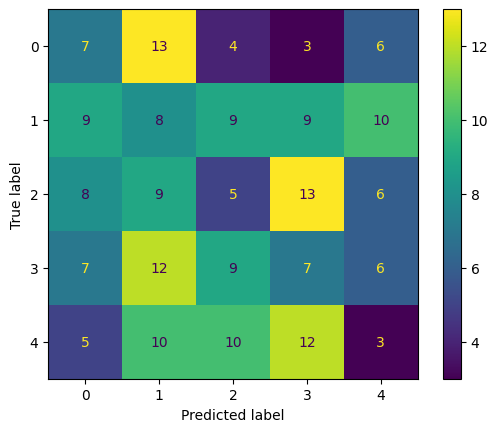

In [54]:
# Calculate AUC-ROC Score
from sklearn.metrics import confusion_matrix


auc_score = roc_auc_score(Y_test, Y_prob, multi_class='ovr')
print(f"AUC-ROC Score: {auc_score:.2f}")

# Print Classification Report
print("Classification Report:\n", classification_report(Y_test, Y_pred))

# Plot ROC Curve
classes = list(range(number_of_class))
cm = confusion_matrix(Y_test, Y_prob.argmax(1),labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classes)
disp.plot()
plt.show()

# Outcome Documentation